In [1]:
import sys
import os
# path_to_script = os.path.dirname(os.path.abspath(__file__))
path_to_imcut = os.path.abspath("..")
sys.path.insert(0, path_to_imcut)


path_to_imcut 
import imcut

imcut.__file__

'C:\\Users\\miros\\projects\\pysegbase\\imcut\\__init__.py'

In [2]:
import numpy as np
import scipy
import scipy.ndimage
# import sed3
import matplotlib.pyplot as plt


## Input data

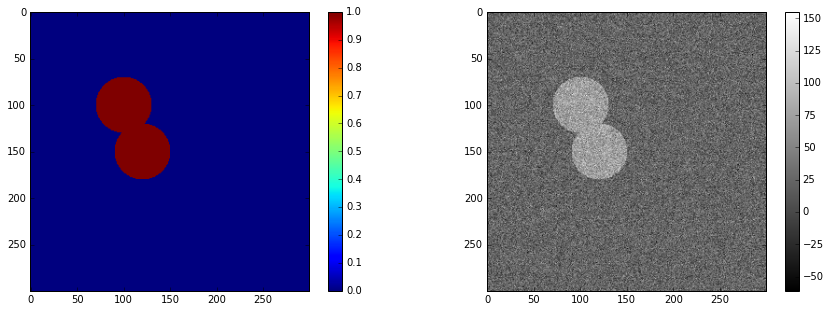

In [3]:
sz = [10, 300, 300]
dist = 30
noise_intensity = 25
noise_std = 20
signal_intensity = 50

segmentation = np.zeros(sz)
segmentation[5, 100, 100] = 1
segmentation[5, 150, 120] = 1
segmentation = scipy.ndimage.morphology.distance_transform_edt(1 - segmentation)
segmentation = (segmentation < dist).astype(np.int8)

seeds = np.zeros_like(segmentation)
seeds[5, 90:100, 90:100] = 1
seeds[5, 190:200, 190:200] = 2
# np.random.random(sz) * 100
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(segmentation[5, :, :])
plt.colorbar()

data3d = np.random.normal(size=sz, loc=noise_intensity, scale=noise_std) 
data3d += segmentation * signal_intensity
data3d = data3d.astype(np.int16)

plt.subplot(122)
plt.imshow(data3d[5, :, :], cmap="gray")
plt.colorbar()

## Graph-Cut segmentation

In [4]:
from imcut import pycut

In [5]:
segparams = {
    'method':'graphcut',
#     'method': 'multiscale_graphcut',
    'use_boundary_penalties': False,
    'boundary_dilatation_distance': 2,
    'boundary_penalties_weight': 1,
    'block_size': 8,
    'tile_zoom_constant': 1
}
gc = pycut.ImageGraphCut(data3d, segparams=segparams)
gc.set_seeds(seeds)
gc.run()
output_segmentation = gc.segmentation

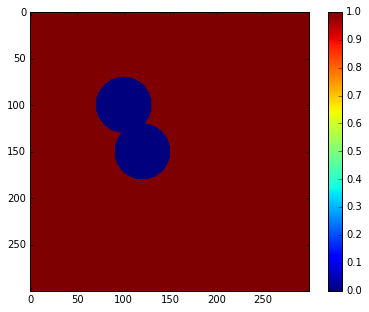

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(output_segmentation[5, :, :])
plt.colorbar()

## Model debug

In [24]:
segparams = {
    'method':'graphcut',
#     'method': 'multiscale_graphcut',
    'use_boundary_penalties': False,
    'boundary_dilatation_distance': 2,
    'boundary_penalties_weight': 1,
    'block_size': 8,
    'tile_zoom_constant': 1
}
gc = pycut.ImageGraphCut(data3d, segparams=segparams)
gc.set_seeds(seeds)
gc.run()
output_segmentation = gc.segmentation

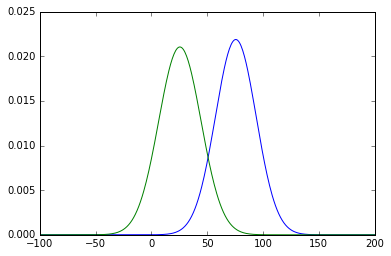

In [35]:
a=gc.debug_show_model(start=-100, stop=200)

tdata1 max  399  min  0  dtype  int32
tdata2 max  272  min  0  dtype  int32


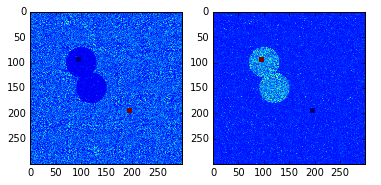

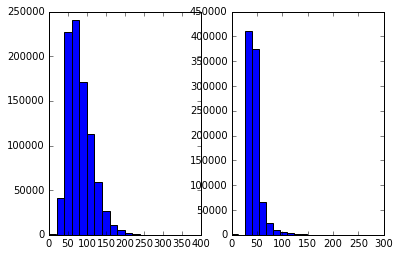

In [28]:
gc.debug_show_reconstructed_similarity()

## Other parameters

In [32]:
segparams_ssgc = {
    "method": "graphcut",
#     "use_boundary_penalties": False,
#     'boundary_penalties_weight': 30,
#     'boundary_penalties_sigma': 200, 
#     'boundary_dilatation_distance': 2,
#     'use_apriori_if_available': True, 
#     'use_extra_features_for_training': False,
#     'apriori_gamma': 0.1,
    "modelparams": {
        "type": "gmmsame",
        "params": {"n_components": 2},
        "return_only_object_with_seeds": True,
        "fv_type": "intensity",
#         "fv_type": "intensity_and_blur",
#         "fv_type": "fv_extern",
#         "fv_extern": fv_fcn()
        
    }
    
}